In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  salary          32561 non-null  object
 11  salary K$       32561 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


In [3]:
df = df.replace("?",np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  31978 non-null  object
 10  salary          32561 non-null  object
 11  salary K$       32561 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


In [4]:
df = df.dropna()

In [5]:
df["salary"]

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: salary, Length: 30162, dtype: object

# Task 1
Print the count of men and women in the dataset.

In [6]:
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

<Axes: xlabel='sex'>

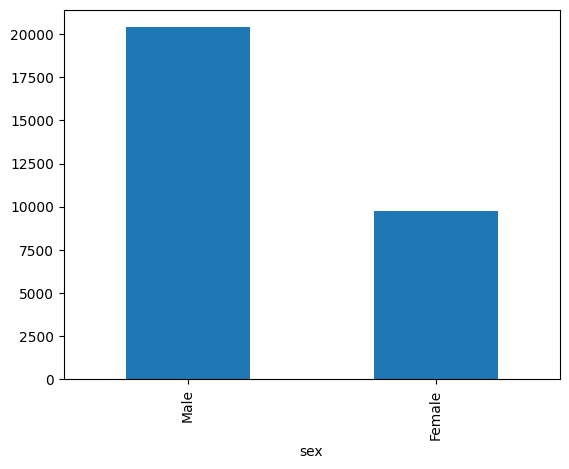

In [7]:
df["sex"].value_counts().plot(kind="bar")


# Task 2
Find the average age of men in dataset

In [8]:
df["age"][df["sex"]=="Male"].mean().round(2)

39.18

# Task 3
Get the percentage of people from Poland (native-country)

In [9]:
(df[df["native-country"] == "Poland"].count() / df.count()).unique().round(4)

array([0.0019])

In [10]:
poland=df["native-country"][df["native-country"] == "Poland"].count()

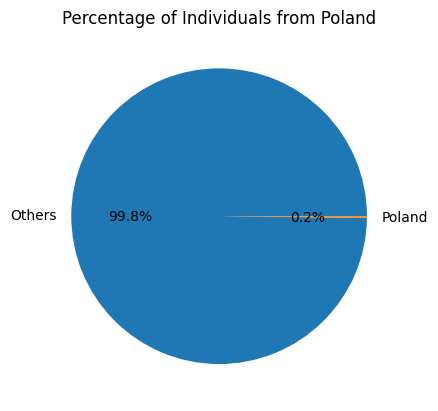

In [12]:
plt.pie([len(df),poland], labels=["Others", "Poland"], autopct='%1.1f%%')
plt.title("Percentage of Individuals from Poland")
plt.show()

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [13]:
df["age"][df["salary"] == ">50K"].mean()

43.95911028236548

In [14]:
df["age"][df["salary"] == ">50K"].std()

10.269632835673852

In [15]:
df["age"][df["salary"] == "<=50K"].mean()

36.60806038668668

In [16]:
df["age"][df["salary"] == "<=50K"].std()

13.464631257161633

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [17]:
df["higher_education"] = np.where(np.isin(df["education"],['Bachelors', 'Masters',
       'Assoc-acdm', 'Doctorate', 'Assoc-voc', 'Prof-school']), 1, 0)

In [18]:
df["salary"][df["higher_education"]==0].value_counts()

salary
<=50K    17081
>50K      3178
Name: count, dtype: int64

<Axes: xlabel='salary'>

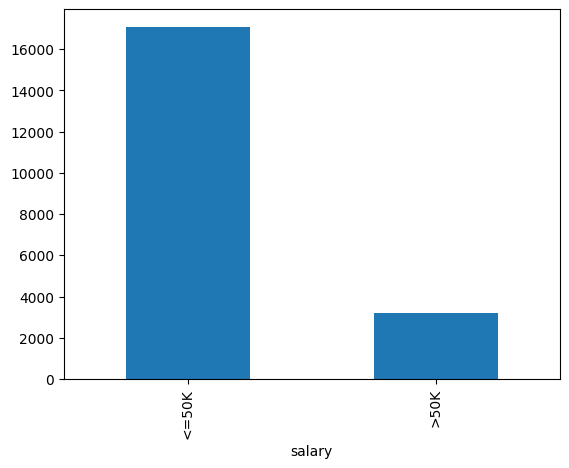

In [19]:
df["salary"][df["higher_education"]==0].value_counts().plot(kind="bar")

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [26]:
df.groupby(["education"]).describe()

age                                                       
               count       mean        std   min   25%   50%   75%   max   
education                                                                  
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0  \
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0   
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0   
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0   
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0   
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0   
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0   
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0   
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0   
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0   
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0   
HS-grad       9840.0  38.640955  13.067730  17.0  28.0  37.0  48.0  90.0   
Masters       1627.0  43.740012  10.735356  18.0  36.0  43.0  50.0  90.0   
Preschool       45.0  41.288889  15.175672  19.0  30.0  40.0  53.0  75.0   
Prof-school    542.0  44.249077  11.428098  25.0  36.0  43.0  50.0  90.0   
Some-college  6678.0  36.135370  13.073528  17.0  25.0  35.0  45.0  90.0   

             hours-per-week             ... salary K$        higher_education   
                      count       mean  ...       75%    max            count   
education                               ...                                     
10th                  820.0  37.464634  ...     43.00  347.0            820.0  \
11th                 1048.0  34.193702  ...     42.00  345.0           1048.0   
12th                  377.0  35.697613  ...     43.00  349.0            377.0   
1st-4th               151.0  38.377483  ...     41.50  279.0            151.0   
5th-6th               288.0  38.798611  ...     43.00  347.0            288.0   
7th-8th               557.0  40.131059  ...     42.00  347.0            557.0   
9th                   455.0  38.767033  ...     42.00  349.0            455.0   
Assoc-acdm           1008.0  41.184524  ...     61.25  349.0           1008.0   
Assoc-voc            1307.0  41.954093  ...     64.00  349.0           1307.0   
Bachelors            5044.0  42.948454  ...    172.00  349.0           5044.0   
Doctorate             375.0  47.832000  ...    237.00  349.0            375.0   
HS-grad              9840.0  41.042073  ...     46.00  349.0           9840.0   
Masters              1627.0  44.240934  ...    207.00  349.0           1627.0   
Preschool              45.0  36.866667  ...     39.00   49.0             45.0   
Prof-school           542.0  47.963100  ...    249.00  346.0            542.0   
Some-college         6678.0  39.411051  ...     47.00  349.0           6678.0   

                                                 
             mean  std  min  25%  50%  75%  max  
education                                        
10th          0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11th          0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12th          0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1st-4th       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5th-6th       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7th-8th       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9th           0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Assoc-acdm    1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Assoc-voc     1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Bachelors     1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Doctorate     1.0  0.0  1.0  1.0  1.0  1.0  1.0  
HS-grad       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Masters       1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Preschool     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Prof-school   1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Some-college  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[16 rows x 32 columns]

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [27]:
df["married"]=np.where(df["marital-status"].str.contains("Married"), 1, 0)

In [28]:
df[df["sex"]=="Male"].groupby(["married"])["salary"].value_counts()

married  salary
0        <=50K     6932
         >50K       673
1        <=50K     7052
         >50K      5723
Name: count, dtype: int64

In [29]:
df[df["sex"]=="Male"].groupby(["married"])["salary K$"].mean()

married
0     46.597239
1    107.494560
Name: salary K$, dtype: float64

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [30]:
df["hours-per-week"].max()

99

In [31]:
df.groupby(["hours-per-week"])["workclass"].count()


hours-per-week
1      7
2     15
3     24
4     27
5     38
      ..
95     2
96     5
97     2
98    11
99    78
Name: workclass, Length: 94, dtype: int64

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [32]:
df[["age", "hours-per-week", "salary K$"]].corr()

,age,hours-per-week,salary K$
age,1.000000,0.101599,0.208203
hours-per-week,0.101599,1.000000,0.196378
salary K$,0.208203,0.196378,1.000000


In [34]:
df[["age", "hours-per-week", "salary K$", "married", "higher_education"]].corr()

,age,hours-per-week,salary K$,married,higher_education
age,1.000000,0.101599,0.208203,0.310553,0.078760
hours-per-week,0.101599,1.000000,0.196378,0.221492,0.138793
salary K$,0.208203,0.196378,1.000000,0.375202,0.254759
married,0.310553,0.221492,0.375202,1.000000,0.091111
higher_education,0.078760,0.138793,0.254759,0.091111,1.000000


Text(0.5, 1.0, 'Correlation between data')

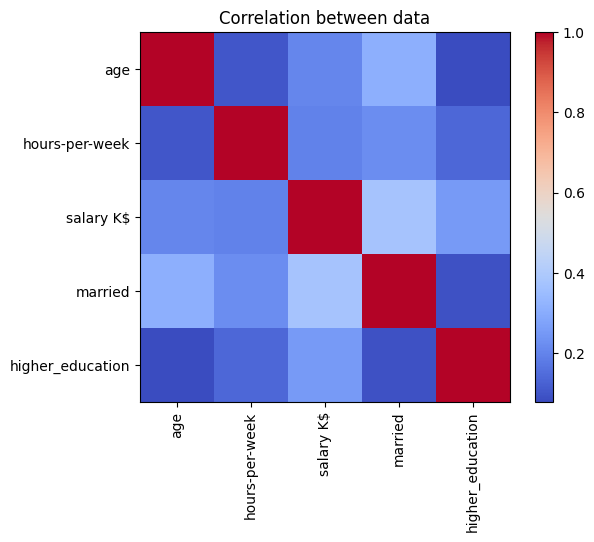

In [41]:
data=df[["age", "hours-per-week", "salary K$", "married", "higher_education"]].corr()
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(data.columns)),data.columns, rotation=90)
plt.yticks(range(len(data.columns)),data.columns)
 
plt.title("Correlation between data")

In [ ]:
salary K$ has positive correlation with higher_education,age and marrital status.

#### 1.Connection between salary and workclass

In [159]:
workclass_info=df.groupby(["workclass"])["salary"].value_counts().unstack().dropna()

In [160]:
workclass_info["persentage-over-50K"]= np.round(workclass_info[">50K"]/(workclass_info[">50K"]+workclass_info["<=50K"]) * 100, 2)

In [161]:
workclass_info

salary,<=50K,>50K,persentage-over-50K
workclass,,,
Federal-gov,578.0,365.0,38.71
Local-gov,1458.0,609.0,29.46
Private,17410.0,4876.0,21.88
Self-emp-inc,474.0,600.0,55.87
Self-emp-not-inc,1785.0,714.0,28.57
State-gov,935.0,344.0,26.90


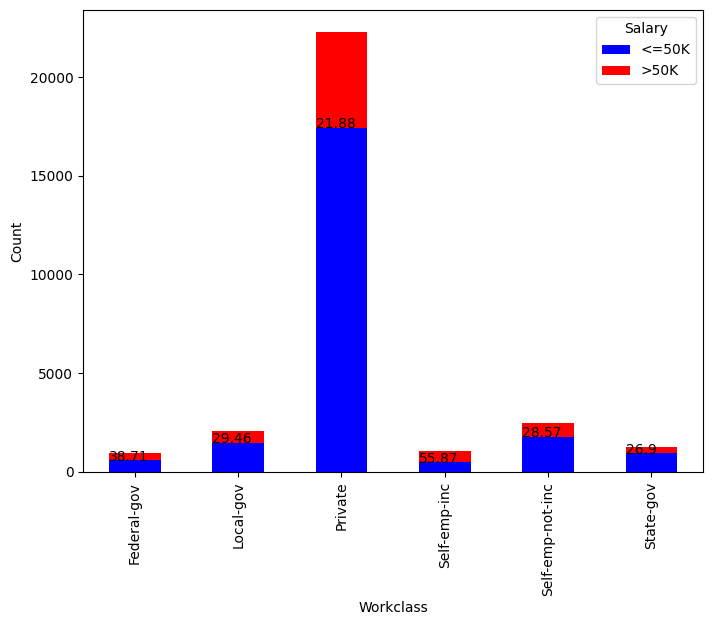

In [164]:
colors = {"<=50K": "blue", ">50K": "red"}
ax = workclass_info[["<=50K",">50K"]].plot(kind="bar", figsize=(8, 6), stacked=True, color=colors)

ax.set_xlabel("Workclass")
ax.set_ylabel("Count")
ax.legend(title="Salary", loc="upper right") 
for i, p in enumerate(ax.patches):
    if i == 6:
        break
    ax.annotate(workclass_info["persentage-over-50K"][i], (p.get_x(), p.get_height()))
plt.show()

#### We see that  Self-emp-inc(55%) and Federal-gov(38%) employee have highest percent of people with salary over 50K.

#### Connection between salary and native-couuntry

<Axes: xlabel='native-country'>

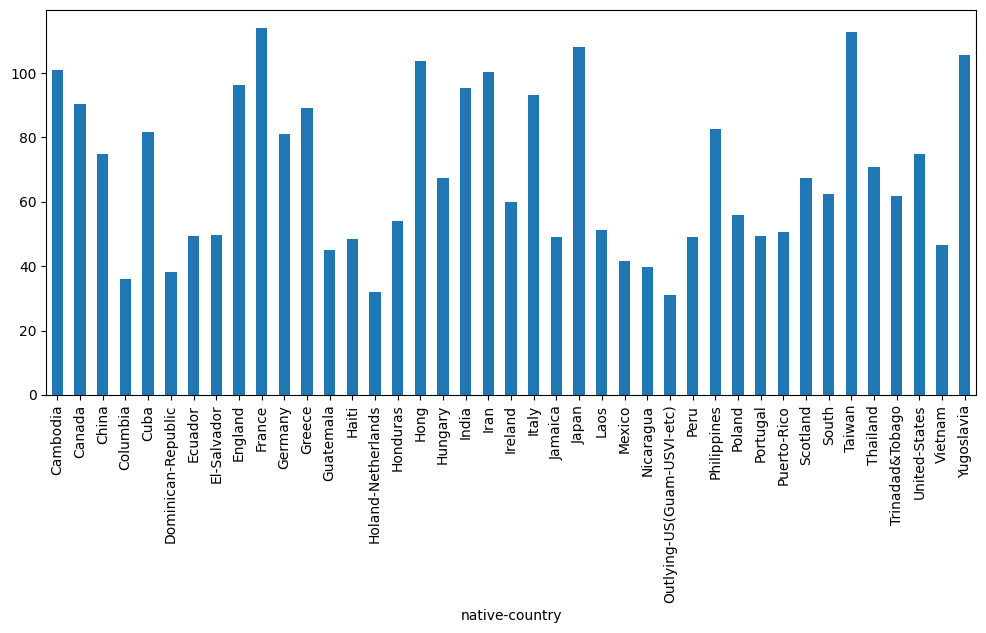

In [45]:
df.groupby(["native-country"])["salary K$"].mean().plot(kind="bar", figsize=(12,5))

### people from country with high GDP usually have better salary.